###### 2020-10-09 금요일

# 한글날 특집 NLP

- KoNLPy 한국어 처리 패키지
- 말뭉치 kolaw(헌법), kobill(국회법)

이전에 크롤링 하면서 `nltk`가 포함된 `KoNLPy` 패키지와 `wordcloud` 패키지를 설치했었어요



###### 만약 없다면

> 아나콘다 프롬프트를 권리자 권한으로 실행하고
>
> `conda install wordcloud` / `conda install konlpy`
>
> 으로 `wordcloud`와 `konlpy`를 설치해주고
>
> `import nltk`입력 후 `stopwords`와 `punkt`를 설치하고 빠져나오세요.



In [2]:
import konlpy

In [3]:
konlpy.__version__

'0.5.2'

- kolaw  : 한국 법률 말뭉치
- kobill : 대한민국 국회 의안 말뭉치

위 말뭉치들을 대려옵시다

In [4]:
from konlpy.corpus import kolaw
from konlpy.corpus import kobill

In [5]:
# kobill에 내장되어있는 데이터를 확인
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

`KoNLPy`에 기본으로 내장되어있는 파일을 불러와 실습해 봅시다.

In [10]:
txt = kobill.open('1809890.txt').read()

- 형태소 분석
- 명사 추출 : nouns()
- 형태소 추출 : morphs()
- 품사 추출 : pos()

### 1. KoNLPy 패키지를 불러옵시다

In [13]:
from konlpy.tag import *

hannanum = Hannanum() # 카이스트에서 만든 형태소분석
kkma = Kkma() # 서울대에서 만든 형태소분석


In [16]:
# 명사 추출 : 한나눔이나 꼬꼬마, 어떤걸로 명사를 추출해도 상관없다
# 둘다 해봐요~ ㅎ
txt[:40]

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호'

형태소를 분석하는 기준은 여러 대학교 연구팀이 만들어 놓은게 있어요

대표적으로 `카이스트`의 `Hannanum`과 `서울대`의 `Kkoma`가 있어요

둘다 한번 써봅시다

In [22]:
# 한나눔
print('한나눔 단어 추출 : \n', hannanum.nouns(txt[:40]))
print('한나눔 형태소 추출 : \n', hannanum.morphs(txt[:40]))
print('한나눔 품사 추출 : \n', hannanum.pos(txt[:40]))

한나눔 단어 추출 : 
 ['지방공무원법', '일부개정법률안', '정의화의원', '대표발', '의', '번']
한나눔 형태소 추출 : 
 ['지방공무원법', '일부개정법률안', '(', '정의화의원', '대표발', '의', ')', '의', '안', '번', '호']
한나눔 품사 추출 : 
 [('지방공무원법', 'N'), ('일부개정법률안', 'N'), ('(', 'S'), ('정의화의원', 'N'), ('대표발', 'N'), ('의', 'J'), (')', 'S'), ('의', 'N'), ('안', 'M'), ('번', 'N'), ('호', 'I')]


In [21]:
# 꼬꼬마
print('꼬꼬마 단어 추출 : \n', kkma.nouns(txt[:40]))
print('꼬꼬마 형태소 추출 : \n', kkma.morphs(txt[:40]))
print('꼬꼬마 품사 추출 : \n', kkma.pos(txt[:40]))

꼬꼬마 단어 추출 : 
 ['지방', '지방공무원법', '공무원', '법', '일부', '일부개정법률안', '개정', '법률안', '정의', '정의화의원', '화', '의원', '대표', '대표발의', '발의', '의', '안', '호']
꼬꼬마 형태소 추출 : 
 ['지방', '공무원', '법', '일부', '개정', '법률안', '(', '정의', '화', '의원', '대표', '발의', ')', '의', '안', '벌', 'ㄴ', '호']
꼬꼬마 품사 추출 : 
 [('지방', 'NNG'), ('공무원', 'NNG'), ('법', 'NNG'), ('일부', 'NNG'), ('개정', 'NNG'), ('법률안', 'NNG'), ('(', 'SS'), ('정의', 'NNG'), ('화', 'NNG'), ('의원', 'NNG'), ('대표', 'NNG'), ('발의', 'NNG'), (')', 'SS'), ('의', 'NNG'), ('안', 'NNG'), ('벌', 'VV'), ('ㄴ', 'ETD'), ('호', 'NNG')]


### 2. Twitter에서 제공하는 형태소 분석기



#### (1) 트위터에서 제공해 주는 형태소 분석기를 사용해 봅시다

In [6]:
from konlpy.tag import Twitter
t = Twitter()

C:\Users\lan41\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [7]:
# 기본으로 내장되어 있는 파일을 사용해요!
txt = kobill.open('1809890.txt').read()

단어를 추출 합니다

In [8]:
token_ko = t.nouns(txt)
print(token_ko)

['지방공무원법', '일부', '개정', '법률', '안', '정의화', '의원', '대표', '발의', '의', '안', '번', '호', '발의', '연월일', '발', '의', '자', '정의화', '이명수', '김을동', '이사철', '여상규', '안규백', '황영철', '박영아', '김정훈', '김학송', '의원', '인', '제안', '이유', '및', '내용', '초등학교', '저학년', '경우', '부모', '사랑', '필요', '나이', '현재', '공무원', '자녀', '양육', '위', '육아휴직', '수', '자녀', '나이', '만', '세', '이하', '초등학교', '저학년', '자녀', '위', '해당', '부모님', '일자리', '곧', '출산', '의욕', '저하', '문제', '수', '것임', '따라서', '육아휴직', '자녀', '연령', '만', '세', '이하', '개정', '것임', '안', '제', '항제', '호', '법률', '제', '호', '지방공무원법', '일부', '개정', '법률', '안', '지방공무원법', '일부', '다음', '개정', '제', '항제', '호', '중', '만', '세', '이하', '초등학교', '취학', '전', '자녀', '만', '세', '이하', '취학', '중인', '경우', '초등학교', '학년', '이하', '말', '의', '자녀', '로', '부', '칙', '이', '법', '공포', '날', '시행', '신', '구조', '문대비', '표', '현', '행', '개', '정', '안', '제', '휴직', '생', '략', '제', '휴직', '현행', '공무원', '다음', '각', '호의', '느', '하나', '해당', '사유', '직', '임용', '휴직', '명', '수', '다만', '제', '호', '의', '경우', '대통령령', '정', '사정', '직', '명', '생', '략', '현행', '만', '세', '이하', '초등학교', '취',

#### (2) NLTK(Natural Langauge processing ToolKit)을 사용해 `Twitter`를 통해 추출된 단어를 처리해 봅시다

In [9]:
import nltk
nltk.download()

ko = nltk.Text(token_ko, name='국회법안')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [10]:
print(len(ko.tokens))
print(len(set(ko.tokens)))

735
250


In [45]:
# 시각화를 위해 그래프 옵션을 지정해 주었어요

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 한글 폰트 문제 해결

import platform
from matplotlib import font_manager, rc

# plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')

elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

단어의 빈도를 그래프로 그려봐요

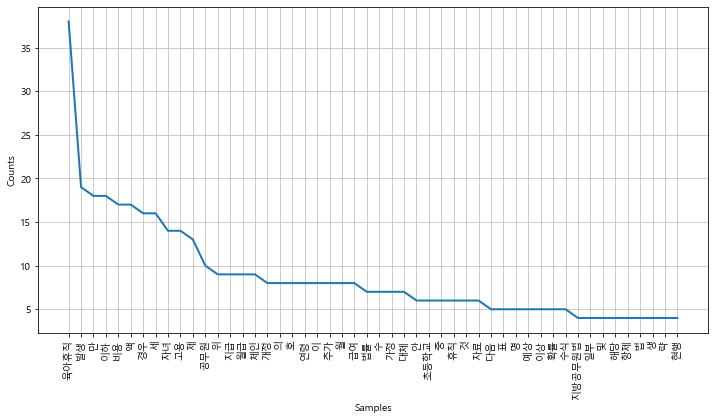

In [46]:
plt.figure(figsize=(12, 6))
ko.plot(50)
plt.show()

#### (3) 불용어를 처리해 봅시다

`sw`라는 리스트에 불용어를 지정해 줍니다!

In [11]:
sw = ['만', '액', '제', '위', '의', '호', '이', '수', '것']

불용어를 제거해 줍니다 ㅎㅎ

In [58]:
ko = [word for word in ko if word not in sw]
print(ko)


['지방공무원법', '일부', '개정', '법률', '안', '정의화', '의원', '대표', '발의', '안', '번', '발의', '연월일', '발', '자', '정의화', '이명수', '김을동', '이사철', '여상규', '안규백', '황영철', '박영아', '김정훈', '김학송', '의원', '인', '제안', '이유', '및', '내용', '초등학교', '저학년', '경우', '부모', '사랑', '필요', '나이', '현재', '공무원', '자녀', '양육', '육아휴직', '자녀', '나이', '세', '이하', '초등학교', '저학년', '자녀', '해당', '부모님', '일자리', '곧', '출산', '의욕', '저하', '문제', '것임', '따라서', '육아휴직', '자녀', '연령', '세', '이하', '개정', '것임', '안', '항제', '법률', '지방공무원법', '일부', '개정', '법률', '안', '지방공무원법', '일부', '다음', '개정', '항제', '중', '세', '이하', '초등학교', '취학', '전', '자녀', '세', '이하', '취학', '중인', '경우', '초등학교', '학년', '이하', '말', '자녀', '로', '부', '칙', '법', '공포', '날', '시행', '신', '구조', '문대비', '표', '현', '행', '개', '정', '안', '휴직', '생', '략', '휴직', '현행', '공무원', '다음', '각', '호의', '느', '하나', '해당', '사유', '직', '임용', '휴직', '명', '다만', '경우', '대통령령', '정', '사정', '직', '명', '생', '략', '현행', '세', '이하', '초등학교', '취', '세', '이하', '취학', '중인', '경우', '학', '전', '자녀', '양육', '초등학교', '학년', '이하', '여', '여자', '공무원', '말', '자녀', '임신', '출산', '때', '생', '략', '생

In [61]:
ko = nltk.Text(ko, name='국회법안')
ko

<Text: 국회법안>

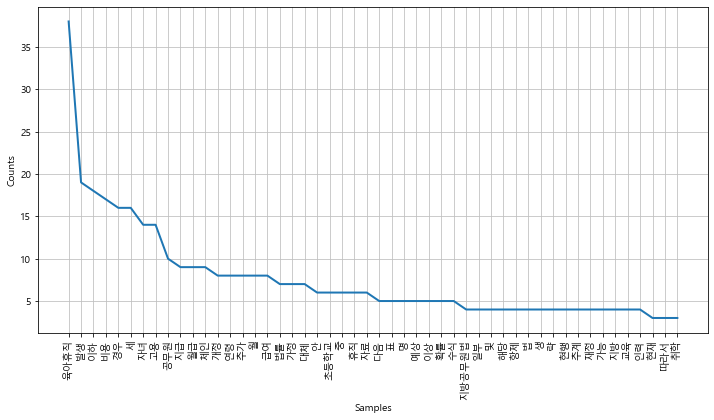

In [63]:
plt.figure(figsize=(12, 6))
ko.plot(50)
plt.show()

#### (4) 처리된 텍스트들을 워드클라우드에 적용해 봅시다

- ko.vocab()                   : Twitter를 통해 추출된 단어들(ko)의 빈도를 세어 줍니다.
- ko.vocab().most_common(150)  : Twitter를 통해 추출된 단어들(ko) 중, 빈도가 150이상인 단어만 추출해 줍니다.

In [12]:
data = ko.vocab().most_common(150)

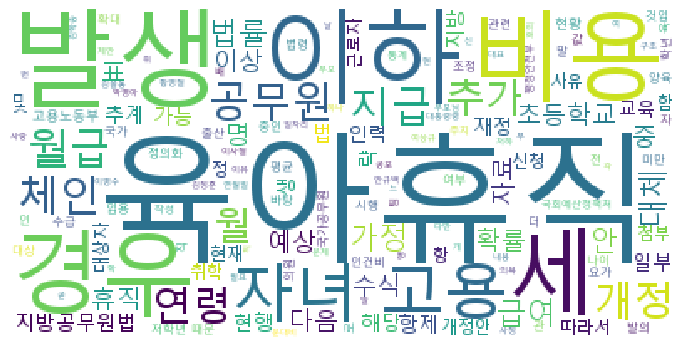

In [75]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
